# Final project: The battle of Neighborhoods

## PART 1: Creating the dataframe

In [1]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors'
table = pd.read_html(url)
df = pd.DataFrame(table[0])
pd.set_option('display.max_columns', 5000)
df.columns = ['Rank_arrivals','Rank_income','City','Country','Arrivals_2018','Arrivals_income_2016','Growthin arrivals','Income_billion$']
df = df[0:]
df.shape

(140, 8)

In [2]:
df.head()

,Rank_arrivals,Rank_income,City,Country,Arrivals_2018,Arrivals_income_2016,Growthin arrivals,Income_billion$
0,1.0,11.0,Hong Kong,Hong Kong,29262700.0,8370000.0,5.0%,6.84
1,2.0,1.0,Bangkok,Thailand,24177500.0,21470000.0,7.7%,14.84
2,3.0,2.0,London,United Kingdom,19233000.0,19880000.0,−3.0%,19.76
3,4.0,NaN,Macau,Macau,18931400.0,NaN,9.2%,NaN
4,5.0,6.0,Singapore,Singapore,18551200.0,12110000.0,5.3%,12.54


Because all cases of missing values were happened at least three columns, I decide to delete these rows. 

In [3]:
df_na = df.dropna(axis=0, how='any')
df_drop = df_na.drop(['Rank_arrivals','Rank_income','Arrivals_income_2016','Growthin arrivals'],axis=1)
df_sort = df_drop.sort_values(by=['Income_billion$'],ascending=0)

In [4]:
df_new = pd.DataFrame([])
df_new['City'] = df_sort['City'].values
df_new['Country'] = df_sort['Country'].values
df_new['Arrivals_2018'] = df_sort['Arrivals_2018'].values
df_new['Income_billion$'] = df_sort['Income_billion$'].values
df_new.shape

(60, 4)

In [5]:
df_new.head(10)

,City,Country,Arrivals_2018,Income_billion$
0,Dubai,United Arab Emirates,15920700.0,31.30
1,London,United Kingdom,19233000.0,19.76
2,New York City,United States,13600000.0,18.52
3,Bangkok,Thailand,24177500.0,14.84
4,Tokyo,Japan,9985100.0,13.48
5,Paris,France,17560200.0,12.88
6,Singapore,Singapore,18551200.0,12.54
7,Kuala Lumpur,Malaysia,13434300.0,11.34
8,Seoul,South Korea,8431400.0,11.30
9,Taipei,Taiwan,9597800.0,9.60


**I just chose top 10 cities, which have the best income**

In [6]:
Ranking = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
top_10 = df_new.head(10)
top_10.insert(0,'Ranking',Ranking)

top_10.head(10)

,Ranking,City,Country,Arrivals_2018,Income_billion$
0,1,Dubai,United Arab Emirates,15920700.0,31.30
1,2,London,United Kingdom,19233000.0,19.76
2,3,New York City,United States,13600000.0,18.52
3,4,Bangkok,Thailand,24177500.0,14.84
4,5,Tokyo,Japan,9985100.0,13.48
5,6,Paris,France,17560200.0,12.88
6,7,Singapore,Singapore,18551200.0,12.54
7,8,Kuala Lumpur,Malaysia,13434300.0,11.34
8,9,Seoul,South Korea,8431400.0,11.30
9,10,Taipei,Taiwan,9597800.0,9.60


**Searching coordinates of each citites**

In [7]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [8]:
top_10["Location"]= top_10["City"].str.cat(top_10['Country'], sep =",")
top_10

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Ranking,City,Country,Arrivals_2018,Income_billion$,Location
0,1,Dubai,United Arab Emirates,15920700.0,31.30,"Dubai,United Arab Emirates"
1,2,London,United Kingdom,19233000.0,19.76,"London,United Kingdom"
2,3,New York City,United States,13600000.0,18.52,"New York City,United States"
3,4,Bangkok,Thailand,24177500.0,14.84,"Bangkok,Thailand"
4,5,Tokyo,Japan,9985100.0,13.48,"Tokyo,Japan"
5,6,Paris,France,17560200.0,12.88,"Paris,France"
6,7,Singapore,Singapore,18551200.0,12.54,"Singapore,Singapore"
7,8,Kuala Lumpur,Malaysia,13434300.0,11.34,"Kuala Lumpur,Malaysia"
8,9,Seoul,South Korea,8431400.0,11.30,"Seoul,South Korea"
9,10,Taipei,Taiwan,9597800.0,9.60,"Taipei,Taiwan"


In [9]:
geolocator = Nominatim(user_agent="thaitran")
Latitude = []
Longitude = []
for i in range(0,10):
    address = top_10.Location[i]
    location = geolocator.geocode(address)
    print(address,'has latitude: ',location.latitude,', and longtitude: ',location.longitude)
    Latitude.insert(i,location.latitude)
    Longitude.insert(i,location.longitude)

top_10['Latitude'] = Latitude
top_10['Longitude'] = Longitude
top_10.head(10)

Dubai,United Arab Emirates has latitude:  25.0657 , and longtitude:  55.1713
London,United Kingdom has latitude:  51.5073219 , and longtitude:  -0.1276474
New York City,United States has latitude:  40.7127281 , and longtitude:  -74.0060152
Bangkok,Thailand has latitude:  13.7542529 , and longtitude:  100.493087
Tokyo,Japan has latitude:  35.6828387 , and longtitude:  139.7594549
Paris,France has latitude:  48.8566969 , and longtitude:  2.3514616
Singapore,Singapore has latitude:  1.357107 , and longtitude:  103.8194992
Kuala Lumpur,Malaysia has latitude:  3.1516964 , and longtitude:  101.6942371
Seoul,South Korea has latitude:  37.5666791 , and longtitude:  126.9782914
Taipei,Taiwan has latitude:  25.0375198 , and longtitude:  121.5636796


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Ranking,City,Country,Arrivals_2018,Income_billion$,Location,Latitude,Longitude
0,1,Dubai,United Arab Emirates,15920700.0,31.30,"Dubai,United Arab Emirates",25.065700,55.171300
1,2,London,United Kingdom,19233000.0,19.76,"London,United Kingdom",51.507322,-0.127647
2,3,New York City,United States,13600000.0,18.52,"New York City,United States",40.712728,-74.006015
3,4,Bangkok,Thailand,24177500.0,14.84,"Bangkok,Thailand",13.754253,100.493087
4,5,Tokyo,Japan,9985100.0,13.48,"Tokyo,Japan",35.682839,139.759455
5,6,Paris,France,17560200.0,12.88,"Paris,France",48.856697,2.351462
6,7,Singapore,Singapore,18551200.0,12.54,"Singapore,Singapore",1.357107,103.819499
7,8,Kuala Lumpur,Malaysia,13434300.0,11.34,"Kuala Lumpur,Malaysia",3.151696,101.694237
8,9,Seoul,South Korea,8431400.0,11.30,"Seoul,South Korea",37.566679,126.978291
9,10,Taipei,Taiwan,9597800.0,9.60,"Taipei,Taiwan",25.037520,121.563680


**Mapping these locations in world's map**

In [10]:
map_top_10 = top_10.drop(['Arrivals_2018','Location'],axis=1)
map_top_10.Country[2] = 'United States of America' #Appropriate name by following the indicator of map
map_top_10.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Ranking,City,Country,Income_billion$,Latitude,Longitude
0,1,Dubai,United Arab Emirates,31.30,25.065700,55.171300
1,2,London,United Kingdom,19.76,51.507322,-0.127647
2,3,New York City,United States of America,18.52,40.712728,-74.006015
3,4,Bangkok,Thailand,14.84,13.754253,100.493087
4,5,Tokyo,Japan,13.48,35.682839,139.759455
5,6,Paris,France,12.88,48.856697,2.351462
6,7,Singapore,Singapore,12.54,1.357107,103.819499
7,8,Kuala Lumpur,Malaysia,11.34,3.151696,101.694237
8,9,Seoul,South Korea,11.30,37.566679,126.978291
9,10,Taipei,Taiwan,9.60,25.037520,121.563680


In [11]:
!wget --quiet https://raw.githubusercontent.com/parulnith/Visualising-Geospatial-data-with-Python/master/world-countries.json -O world-countries.json
country_geo = r'world-countries.json'
world_map = folium.Map(location=[20,0],zoom_start=2)
for i in range(0,len(top_10)):
    folium.Marker([map_top_10.iloc[i]['Latitude'],map_top_10.iloc[i]['Longitude']],popup=map_top_10.iloc[i]['City']).add_to(world_map)
world_map.choropleth(
    geo_data=country_geo,
    data=map_top_10,
    columns=['Country','Income_billion$'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=0.8, 
    line_opacity=0.3,
    legend_name='Income (MasterCard) from international visitors - billion US dollars'
)
world_map

## PART 2: Determining the advantage points by clustering all venues with its geograpic data.

**1. Define Foursquare Credentials and its version**

In [12]:
CLIENT_ID = 'UWJJQEM3PRAXT0G0OEEJF0KEQYLVLC1RQ4LCINHXDSIMVLEH'
CLIENT_SECRET = 'MSWWUQODJHCLCIX3C0MDB5CBV0Q1QY0IDM4POE1UJAZSTFJJ'
VERSION='20180412'

**2. Selecting all venues within the cities **

In [13]:
import requests
def getNearbyVenues(names, latitudes, longitudes):
    LIMIT=1000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION,
            lat, 
            lng,  
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue',
                  'Venue ID',           
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
city_venues = getNearbyVenues(names=top_10['City'],
                                   latitudes=top_10['Latitude'],
                                   longitudes=top_10['Longitude'])

Dubai
London
New York City
Bangkok
Tokyo
Paris
Singapore
Kuala Lumpur
Seoul
Taipei


In [15]:
city_venues.head(10)

,City,City Latitude,City Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Dubai,25.0657,55.1713,Address Montgomerie,5013dd25e4b00c72b6a65216,25.067573,55.164683,Hotel
1,Dubai,25.0657,55.1713,The Montgomerie Golf Club,4b7527bef964a52079ff2de3,25.067783,55.161674,Golf Course
2,Dubai,25.0657,55.1713,Jumeirah Islands Club,4d565ee7143ca093ec65bafc,25.052548,55.162677,Beach Bar
3,Dubai,25.0657,55.1713,Spinneys (سبينس),4b965848f964a52037c734e3,25.053915,55.171185,Supermarket
4,Dubai,25.0657,55.1713,Reform Social Grill,525a79c0498e0047744cb3ed,25.078981,55.167761,Gastropub
5,Dubai,25.0657,55.1713,Shakespeare and Co. شكسبير أند كو,4b9109aff964a52053a033e3,25.054054,55.170452,Café
6,Dubai,25.0657,55.1713,The Lakes Club,4f44e356e4b0b7292ef12f84,25.078679,55.167645,Restaurant
7,Dubai,25.0657,55.1713,Starbucks,4ca9c1e6b0b8236aeefebfe6,25.053882,55.171147,Coffee Shop
8,Dubai,25.0657,55.1713,Fitness First Lakes Club,4dc3add57d8b14fb45fd94a0,25.079247,55.167439,Gym / Fitness Center
9,Dubai,25.0657,55.1713,The Town Center (تاون سنتر),4b607d67f964a5204ce929e3,25.053870,55.171148,Shopping Mall


* Note: If you can retrieve all data, which is related to Vistits Count, Checkin Count, liked count, and rating score, you can know better the business oppotunities in these areas.

def getInfoVenues(Venue_IDs):
    venues_list=[]
    for i in range(0,len(Venue_IDs)):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            Venue_IDs[i], 
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION)
        print (url)
        # make the GET request
        visitsCount = requests.get(url).json()["response"]['venue']['stats']['visitsCount']
        checkinsCount = requests.get(url).json()["response"]['venue']['stats']['checkinsCount']
        likes = requests.get(url).json()["response"]['venue']['likes']['count']
        rating = requests.get(url).json()["response"]['venue']['rating']
        print (likes)
        # return only relevant information for each nearby venue
        venues_list.append(
            Venue_IDs[i],
            visitsCount,
            checkinsCount,
            likes,
            rating)

    info_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    info_venues.columns = ['Venue_ID',
                  'Visits Count',
                  'Checkins Count', 
                  'Likes Count',
                  'Rating']
    
    return(info_venues)

info_venues = getInfoVenues(Venue_IDs = Dubai_data['Venue ID'])
info_venues.head(50)

**3. Clustering venues in each city by these coordinates**

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

### The Investigation in Dubai

In [18]:
Dubai_d =city_venues[city_venues['City'].str.contains("Dubai")]
Dubai_data = Dubai_d.reset_index(drop=True)
k_data=Dubai_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head(10)

,Venue ID,Venue Latitude,Venue Longitude
0,5013dd25e4b00c72b6a65216,25.067573,55.164683
1,4b7527bef964a52079ff2de3,25.067783,55.161674
2,4d565ee7143ca093ec65bafc,25.052548,55.162677
3,4b965848f964a52037c734e3,25.053915,55.171185
4,525a79c0498e0047744cb3ed,25.078981,55.167761
5,4b9109aff964a52053a033e3,25.054054,55.170452
6,4f44e356e4b0b7292ef12f84,25.078679,55.167645
7,4ca9c1e6b0b8236aeefebfe6,25.053882,55.171147
8,4dc3add57d8b14fb45fd94a0,25.079247,55.167439
9,4b607d67f964a5204ce929e3,25.053870,55.171148


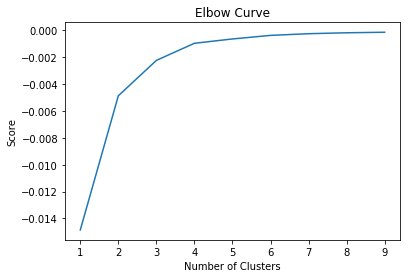

In [19]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['D1','D2','D3'])
City = pd.DataFrame(['Dubai','Dubai','Dubai'])
Country = pd.DataFrame(['United Arab Emirates','United Arab Emirates','United Arab Emirates'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Dubai_rpt = centroids.copy()
Dubai_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,United Arab Emirates,Dubai,D1,25.088783,55.168106
1,United Arab Emirates,Dubai,D2,25.075501,55.145859
2,United Arab Emirates,Dubai,D3,25.058710,55.179493


### The investigation in London

In [21]:
London_d=(city_venues[city_venues['City'].str.contains("London")])
London_data = London_d.reset_index(drop=True)
k_data=London_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4ac518cdf964a520e6a520e3,51.508876,-0.128478
1,4ac518cef964a520f9a520e3,51.507987,-0.128048
2,50aa7c98e4b0d042f9f0bd59,51.508088,-0.127700
3,5320a0a6498e8dd49f5aa981,51.508384,-0.129001
4,50aa6e60e4b078585157bbb5,51.507641,-0.127888


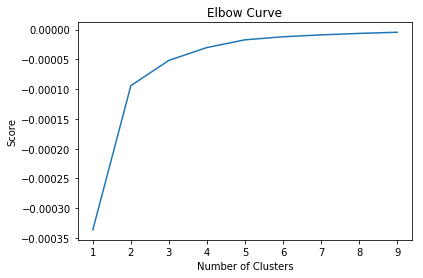

In [22]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['L1','L2','L3'])
City = pd.DataFrame(['London','London','London'])
Country = pd.DataFrame(['United Kingdom','United Kingdom','United Kingdom'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
London_rpt = centroids.copy()
London_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,United Kingdom,London,L1,51.510417,-0.125521
1,United Kingdom,London,L2,51.509081,-0.131554
2,United Kingdom,London,L3,51.506691,-0.126605


### The investigation in New York(NY)

In [24]:
NY_d=(city_venues[city_venues['City'].str.contains("New York City")])
NY_data = NY_d.reset_index(drop=True)
k_data=NY_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,57f0689d498e7d49d9189369,40.711448,-74.006802
1,56d8c0f8498edb854f926e6a,40.711173,-74.006702
2,4c606c3e1e5cd13ad1a1a1ed,40.711434,-74.006272
3,3fd66200f964a520d8f11ee3,40.712415,-74.006724
4,53373f26498e940581c90985,40.713923,-74.005661


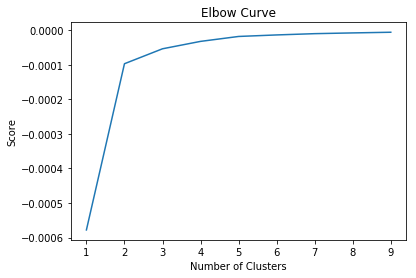

In [25]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['NY1','NY2','NY3'])
City = pd.DataFrame(['New York City','New York City','New York City'])
Country = pd.DataFrame(['United States of America','United States of America','United States of America'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
NY_rpt = centroids.copy()
NY_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,United States of America,New York City,NY1,40.715027,-74.007946
1,United States of America,New York City,NY2,40.710636,-74.007659


### The investigation in Bangkok

In [27]:
Bangkok_d=(city_venues[city_venues['City'].str.contains("Bangkok")])
Bangkok_data = Bangkok_d.reset_index(drop=True)
k_data=Bangkok_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4b0587f9f964a52001aa22e3,13.751735,100.492651
1,5010afc9e4b090757f48c99a,13.755783,100.491980
2,4d9bdddd7ae5548198a34174,13.751606,100.492720
3,4c029d3c302295213c6fde81,13.756602,100.494767
4,4ceb69b1d27560fca3439b3a,13.751150,100.491615


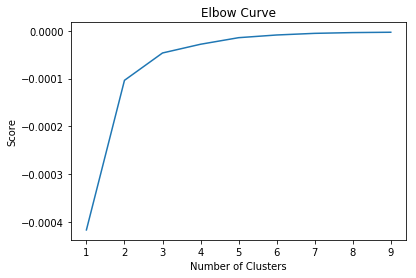

In [28]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['L1','L2','L3'])
City = pd.DataFrame(['Bangkok','Bangkok','Bangkok'])
Country = pd.DataFrame(['Thailand','Thailand','Thailand'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Bangkok_rpt = centroids.copy()
Bangkok_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,Thailand,Bangkok,L1,13.752736,100.498033
1,Thailand,Bangkok,L2,13.753480,100.490267
2,Thailand,Bangkok,L3,13.757981,100.494926


### The investigation in Tokyo(Tk)

In [30]:
Tokyo_d=(city_venues[city_venues['City'].str.contains("Tokyo")])
Tokyo_data = Tokyo_d.reset_index(drop=True)
k_data=Tokyo_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4b05879af964a520ac9b22e3,35.684644,139.761302
1,4fa0e65fe4b03ac4daf0aa6b,35.684026,139.761426
2,4b7f961bf964a5208c3530e3,35.683453,139.760829
3,4b58ec71f964a520467328e3,35.679928,139.758562
4,50837f31e4b00b2c40b542ed,35.684559,139.761064


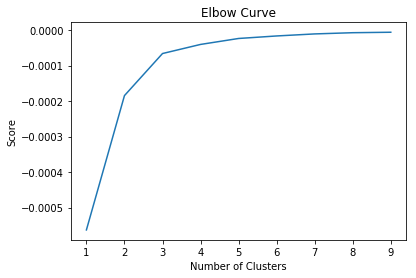

In [31]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['Tk1','Tk2','Tk3'])
City = pd.DataFrame(['Tokyo','Tokyo','Tokyo'])
Country = pd.DataFrame(['Japan','Japan','Japan'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Tokyo_rpt = centroids.copy()
Tokyo_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,Japan,Tokyo,Tk1,35.680889,139.764140
1,Japan,Tokyo,Tk2,35.684921,139.762806
2,Japan,Tokyo,Tk3,35.683652,139.756037


### The investigation in Paris(P)

In [33]:
Paris_d=(city_venues[city_venues['City'].str.contains("Paris")])
Paris_data = Paris_d.reset_index(drop=True)
k_data=Paris_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4bf41231e5eba59334341f90,48.856925,2.351412
1,58e0f18f561ded7abcbbbd01,48.855510,2.351419
2,54351b59498e123ee4afc7ff,48.858275,2.350381
3,58d800df9435a979b8a645fa,48.855131,2.352289
4,4dbd336b6a23e294ba405cfa,48.857882,2.348757


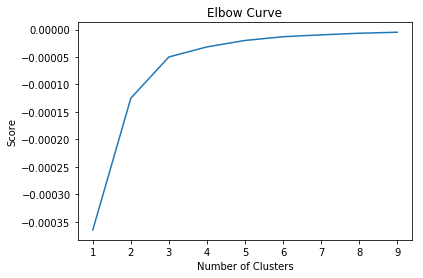

In [34]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['P1','P2','P3'])
City = pd.DataFrame(['Paris','Paris','Paris'])
Country = pd.DataFrame(['France','France','France'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Paris_rpt = centroids.copy()
Paris_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,France,Paris,P1,48.858968,2.352753
1,France,Paris,P2,48.857261,2.348593
2,France,Paris,P3,48.856740,2.356175


### The investigation in Singapore(Sp)

In [36]:
Sp_d=(city_venues[city_venues['City'].str.contains("Singapore")])
Sp_data = Sp_d.reset_index(drop=True)
k_data=Sp_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4e1838aa14957dc705d4d8ab,1.359105,103.818598
1,4e478d1562845e1d3ca115bd,1.356079,103.813523
2,58fbf5835161137445c4f878,1.359886,103.825420
3,4b058810f964a52066af22e3,1.361061,103.811445
4,4dabe0ae8154abafc2cc0a7b,1.347312,103.831411


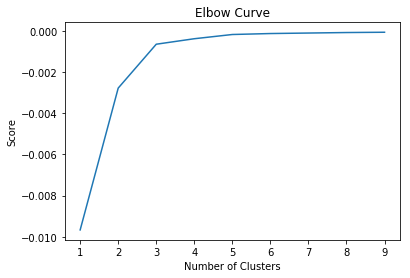

In [37]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['Sp1','Sp2','Sp3'])
City = pd.DataFrame(['Singapore','Singapore','Singapore'])
Country = pd.DataFrame(['Singapore','Singapore','Singapore'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Sp_rpt = centroids.copy()
Sp_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,Singapore,Singapore,Sp1,1.353770,103.834297
1,Singapore,Singapore,Sp2,1.347414,103.813966
2,Singapore,Singapore,Sp3,1.369919,103.830813


### The investigation in Kuala Lumpur(Kl)

In [39]:
Kl_d = (city_venues[city_venues['City'].str.contains("Kuala Lumpur")])
Kl_data = Kl_d.reset_index(drop=True)
k_data = Kl_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,58475905ea29b87d6c599c41,3.151703,101.695623
1,4c4260aae26920a1360a60e7,3.151061,101.696074
2,4d65cd0a56746dcbae433fff,3.152154,101.694922
3,50b90133e4b0f99bbd97ebfe,3.149285,101.694173
4,4d638be3bd2537042838cec5,3.152254,101.695964


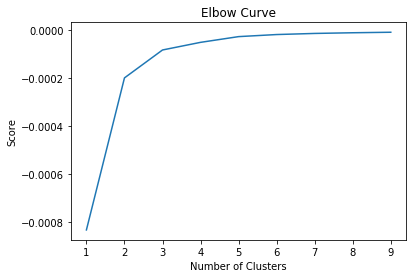

In [40]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['Kl1','Kl2','Kl3'])
City = pd.DataFrame(['Kuala Lumpur','Kuala Lumpur','Kuala Lumpur'])
Country = pd.DataFrame(['Malaysia','Malaysia','Malaysia'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Kl_rpt = centroids.copy()
Kl_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,Malaysia,Kuala Lumpur,Kl1,3.154628,101.696451
1,Malaysia,Kuala Lumpur,Kl2,3.151855,101.693946
2,Malaysia,Kuala Lumpur,Kl3,3.148755,101.696957


### The investigation in Seoul(Se)

In [42]:
Se_d = (city_venues[city_venues['City'].str.contains("Seoul")])
Se_data = Se_d.reset_index(drop=True)
k_data = Se_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4ba1a9adf964a5209bc637e3,37.567852,126.979753
1,4caea82aaef16dcbad8ba254,37.568153,126.978265
2,4baf0f0bf964a52021e93be3,37.565475,126.977937
3,572c2d36498ec2eb8308ade5,37.564705,126.977667
4,4b058782f964a520799622e3,37.564621,126.978060


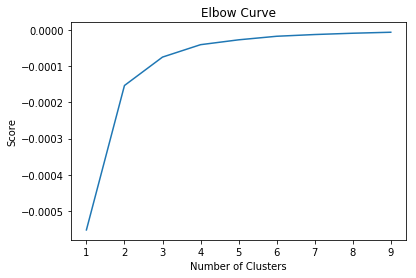

In [43]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['Se1','Se2','Se3'])
City = pd.DataFrame(['Seoul','Seoul','Seoul'])
Country = pd.DataFrame(['South Korea','South Korea','South Korea'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Se_rpt = centroids.copy()
Se_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,South Korea,Seoul,Se1,37.565958,126.974887
1,South Korea,Seoul,Se2,37.565283,126.980273
2,South Korea,Seoul,Se3,37.569466,126.978108


### The investigation in Tapei(Tp)

In [45]:
Tp_d = (city_venues[city_venues['City'].str.contains("Taipei")])
Tp_data = Tp_d.reset_index(drop=True)
k_data = Tp_data.loc[:,['Venue ID','Venue Latitude','Venue Longitude']]
k_data.head()

,Venue ID,Venue Latitude,Venue Longitude
0,4b4b1876f964a520389226e3,25.039232,121.565577
1,4b1d043bf964a5202c0b24e3,25.035512,121.562644
2,4cd8e03253a7f04d8b8e6516,25.037425,121.566932
3,4b87b764f964a5207dc831e3,25.040752,121.565741
4,4d4a5f734509721e42872db0,25.036650,121.566931


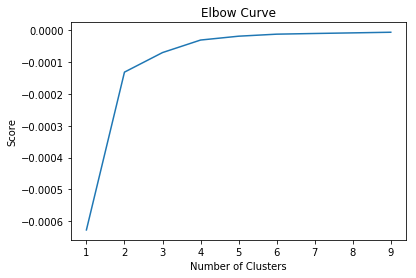

In [46]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = k_data[['Venue Latitude']]
X_axis = k_data[['Venue Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(k_data[k_data.columns[1:3]]) # Compute k-means clustering.
k_data['Cluster_label'] = kmeans.fit_predict(k_data[k_data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(k_data[k_data.columns[1:3]]) # Labels of each point
centroids = pd.DataFrame(centers)
centroids.columns = ['Adv Latitude','Adv Longitude']
Cluster = pd.DataFrame(['Tp1','Tp2','Tp3'])
City = pd.DataFrame(['Tapei','Tapei','Tapei'])
Country = pd.DataFrame(['Taiwan','Taiwan','Taiwan'])
centroids.insert(0,'Advantage points(Adv)',Cluster)
centroids.insert(0,'City',City)
centroids.insert(0,'Country',Country)
Tp_rpt = centroids.copy()
Tp_rpt.head()

,Country,City,Advantage points(Adv),Adv Latitude,Adv Longitude
0,Taiwan,Tapei,Tp1,25.035146,121.565110
1,Taiwan,Tapei,Tp2,25.039692,121.566086


### Assembly all dataframes of those countries into one

In [48]:
All_rpt = pd.concat([Dubai_rpt,London_rpt,NY_rpt,Bangkok_rpt,Tokyo_rpt,Paris_rpt,Sp_rpt,Kl_rpt,Se_rpt,Tp_rpt], ignore_index=True)
All_rpt.columns = ['Country','City','Advantage points','Adv Latitude','Adv Longitude']
All_rpt.head(50)

,Country,City,Advantage points,Adv Latitude,Adv Longitude
0,United Arab Emirates,Dubai,D1,25.088783,55.168106
1,United Arab Emirates,Dubai,D2,25.075501,55.145859
2,United Arab Emirates,Dubai,D3,25.058710,55.179493
3,United Kingdom,London,L1,51.510417,-0.125521
4,United Kingdom,London,L2,51.509081,-0.131554
5,United Kingdom,London,L3,51.506691,-0.126605
6,United States of America,New York City,NY1,40.715027,-74.007946
7,United States of America,New York City,NY2,40.710636,-74.007659
8,Thailand,Bangkok,L1,13.752736,100.498033
9,Thailand,Bangkok,L2,13.753480,100.490267


## PART 3: Exploring and clustering the familiar bussiness models in different avantage points of top 10 countries which have best income from international visitors

**1. Selecting all venues around the clusters**

In [49]:
import requests
def getNearbyVenues(names, latitudes, longitudes):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION,
            lat, 
            lng,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Advantage points', 
                  'Adv Latitude', 
                  'Adv Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
adv_venues = getNearbyVenues(names=All_rpt['Advantage points'],
                                   latitudes=All_rpt['Adv Latitude'],
                                   longitudes=All_rpt['Adv Longitude'])

D1
D2
D3
L1
L2
L3
NY1
NY2
L1
L2
L3
Tk1
Tk2
Tk3
P1
P2
P3
Sp1
Sp2
Sp3
Kl1
Kl2
Kl3
Se1
Se2
Se3
Tp1
Tp2


**2. Listing venues of the geographic clusters**

In [51]:
adv_venues.head(1000)

,Advantage points,Adv Latitude,Adv Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,D1,25.088783,55.168106,Caribou Coffee,25.092072,55.170752,Coffee Shop
1,D1,25.088783,55.168106,The Greens (الروضة),25.092828,55.170851,Neighborhood
2,D1,25.088783,55.168106,Nando's,25.092767,55.169855,African Restaurant
3,D1,25.088783,55.168106,wagamama,25.093519,55.168353,Asian Restaurant
4,D1,25.088783,55.168106,Carine,25.085501,55.159918,French Restaurant
5,D1,25.088783,55.168106,Emirates Golf Club,25.085411,55.158724,Golf Course
6,D1,25.088783,55.168106,Arrows & Sparrows,25.096239,55.168214,Café
7,D1,25.088783,55.168106,Jones The Grocer,25.085297,55.160142,Australian Restaurant
8,D1,25.088783,55.168106,Starbucks (ستاربكس),25.095454,55.167296,Coffee Shop
9,D1,25.088783,55.168106,Lah Lah,25.096895,55.169730,Asian Restaurant


 **3. Counting all venues with the same clusters**

In [52]:
adv_venues.groupby('Advantage points').count()

,Adv Latitude,Adv Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Advantage points,,,,,,
D1,98,98,98,98,98,98
D2,100,100,100,100,100,100
D3,96,96,96,96,96,96
Kl1,92,92,92,92,92,92
Kl2,100,100,100,100,100,100
Kl3,75,75,75,75,75,75
L1,156,156,156,156,156,156
L2,157,157,157,157,157,157
L3,200,200,200,200,200,200


**4. Mean dataframe of each venue in each Neighborhood**

In [53]:
# one hot encoding
adv_onehot = pd.get_dummies(adv_venues[['Venue Category']], prefix="", prefix_sep="")
 # insert neighborhood column to the first column
adv_onehot.insert(loc=0, column='Advantage points', value=adv_venues['Advantage points'])
adv_grouped = adv_onehot.groupby('Advantage points').mean().reset_index()
adv_grouped.head()

,Advantage points,Adult Boutique,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Bossam/Jokbal Restaurant,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burgundian Restaurant,Burrito Place,Business Center,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Castle,Cha Chaan Teng,Cheese Shop,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gukbap Restaurant,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Lyonese Bouchon,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Samgyetang Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Shrine,Skating Rink,Snack Place,Soccer Field,Som Tum Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room

**5. Ranking common venues in each geographic cluster**

In [54]:
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Advantage points']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
adv_venues_sorted = pd.DataFrame(columns=columns)
adv_venues_sorted['Advantage points'] = adv_grouped['Advantage points']

for ind in np.arange(adv_grouped.shape[0]):
    adv_venues_sorted.iloc[ind, 1:] = return_most_common_venues(adv_grouped.iloc[ind, :], num_top_venues)

adv_venues_sorted.head()

,Advantage points,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,D1,Hotel,Coffee Shop,Bar,Café,Gym / Fitness Center,Italian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Thai Restaurant,Restaurant
1,D2,Hotel,Coffee Shop,Spa,Gym,Café,Burger Joint,Indian Restaurant,Breakfast Spot,Tram Station,Middle Eastern Restaurant
2,D3,Coffee Shop,Hotel,Park,Supermarket,Café,Shopping Mall,Restaurant,Fast Food Restaurant,Convenience Store,Grocery Store
3,Kl1,Hotel,Indian Restaurant,Food Court,Malay Restaurant,Café,Coffee Shop,Cafeteria,Thai Restaurant,Shoe Store,Light Rail Station
4,Kl2,Indian Restaurant,Coffee Shop,Café,Malay Restaurant,Hotel,South Indian Restaurant,Food Court,Bubble Tea Shop,Food Truck,Boutique


**6. Clustering similar groups of venue categories for the business models of each cluster**

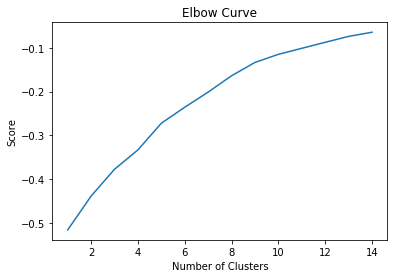

In [55]:
adv_grouped_clustering = adv_grouped.drop('Advantage points', 1)
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(adv_grouped_clustering).score(adv_grouped_clustering) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [56]:
kclusters = 9 # Number of clusters
adv_grouped_clustering = adv_grouped.drop('Advantage points', 1)
# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(adv_grouped_clustering)
# add labels
adv_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
adv_merged = All_rpt
# merge toronto_grouped with toronto_data
adv_merged = adv_merged.join(adv_venues_sorted.set_index('Advantage points'), on='Advantage points')
adv_merged.head()

,Country,City,Advantage points,Adv Latitude,Adv Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,United Arab Emirates,Dubai,D1,25.088783,55.168106,7,Hotel,Coffee Shop,Bar,Café,Gym / Fitness Center,Italian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Thai Restaurant,Restaurant
1,United Arab Emirates,Dubai,D2,25.075501,55.145859,7,Hotel,Coffee Shop,Spa,Gym,Café,Burger Joint,Indian Restaurant,Breakfast Spot,Tram Station,Middle Eastern Restaurant
2,United Arab Emirates,Dubai,D3,25.058710,55.179493,7,Coffee Shop,Hotel,Park,Supermarket,Café,Shopping Mall,Restaurant,Fast Food Restaurant,Convenience Store,Grocery Store
3,United Kingdom,London,L1,51.510417,-0.125521,2,Noodle House,Coffee Shop,Hotel,Dessert Shop,Theater,Thai Restaurant,Asian Restaurant,Bakery,Café,Wine Bar
4,United Kingdom,London,L2,51.509081,-0.131554,2,Theater,Hotel,Ice Cream Shop,Noodle House,Bakery,Café,Palace,Thai Restaurant,Coffee Shop,Seafood Restaurant


In [57]:
adv_merged_mod = adv_merged.copy()
for i in range(0,len(adv_merged_mod['Cluster_Labels'])):
    adv_merged_mod.Cluster_Labels[i] += 1
adv_all_rpt = adv_merged_mod.copy()
adv_all_rpt

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,City,Advantage points,Adv Latitude,Adv Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,United Arab Emirates,Dubai,D1,25.088783,55.168106,8,Hotel,Coffee Shop,Bar,Café,Gym / Fitness Center,Italian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Thai Restaurant,Restaurant
1,United Arab Emirates,Dubai,D2,25.075501,55.145859,8,Hotel,Coffee Shop,Spa,Gym,Café,Burger Joint,Indian Restaurant,Breakfast Spot,Tram Station,Middle Eastern Restaurant
2,United Arab Emirates,Dubai,D3,25.058710,55.179493,8,Coffee Shop,Hotel,Park,Supermarket,Café,Shopping Mall,Restaurant,Fast Food Restaurant,Convenience Store,Grocery Store
3,United Kingdom,London,L1,51.510417,-0.125521,3,Noodle House,Coffee Shop,Hotel,Dessert Shop,Theater,Thai Restaurant,Asian Restaurant,Bakery,Café,Wine Bar
4,United Kingdom,London,L2,51.509081,-0.131554,3,Theater,Hotel,Ice Cream Shop,Noodle House,Bakery,Café,Palace,Thai Restaurant,Coffee Shop,Seafood Restaurant
5,United Kingdom,London,L3,51.506691,-0.126605,3,Bar,Hotel,Theater,Asian Restaurant,Café,Thai Restaurant,Noodle House,Pub,Spa,Cocktail Bar
6,United States of America,New York City,NY1,40.715027,-74.007946,8,Coffee Shop,Hotel,French Restaurant,Gym,Gym / Fitness Center,Spa,Café,Cocktail Bar,Wine Shop,Italian Restaurant
7,United States of America,New York City,NY2,40.710636,-74.007659,8,Coffee Shop,Hotel,Sandwich Place,Italian Restaurant,Pizza Place,Falafel Restaurant,Wine Shop,American Restaurant,Memorial Site,Bar
8,Thailand,Bangkok,L1,13.752736,100.498033,3,Noodle House,Coffee Shop,Hotel,Dessert Shop,Theater,Thai Restaurant,Asian Restaurant,Bakery,Café,Wine Bar
9,Thailand,Bangkok,L2,13.753480,100.490267,3,Theater,Hotel,Ice Cream Shop,Noodle House,Bakery,Café,Palace,Thai Restaurant,Coffee Shop,Seafood Restaurant


**7. Showing these clusters with comparison of their bussiness models on global map and local maps**

In [58]:
import numpy as np
map_clusters = folium.Map(location=[20,0], zoom_start=2)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [59]:
latitude = map_top_10.Latitude[0]
longitude = map_top_10.Longitude[0]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=14)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [60]:
latitude = map_top_10.Latitude[1]
longitude = map_top_10.Longitude[1]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [61]:
latitude = map_top_10.Latitude[2]
longitude = map_top_10.Longitude[2]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [62]:
latitude = map_top_10.Latitude[3]
longitude = map_top_10.Longitude[3]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [63]:
latitude = map_top_10.Latitude[4]
longitude = map_top_10.Longitude[4]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [64]:
latitude = map_top_10.Latitude[5]
longitude = map_top_10.Longitude[5]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [65]:
latitude = map_top_10.Latitude[6]
longitude = map_top_10.Longitude[6]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [66]:
latitude = map_top_10.Latitude[7]
longitude = map_top_10.Longitude[7]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [67]:
latitude = map_top_10.Latitude[8]
longitude = map_top_10.Longitude[8]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters

In [68]:
latitude = map_top_10.Latitude[9]
longitude = map_top_10.Longitude[9]
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=16)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(adv_all_rpt['Adv Latitude'],adv_all_rpt['Adv Longitude'],adv_all_rpt['Advantage points'],adv_all_rpt['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
map_clusters